# Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=pd.read_csv('../csv/Titanic-Dataset.csv')

In [3]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
738,739,0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S
767,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,NaN,Q
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9000,NaN,S


In [4]:
titanic.drop(columns=['PassengerId'],inplace=True)
titanic.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
359,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
338,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S
379,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
640,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S


In [5]:
extract=titanic.Name.str.split(',',expand=True)[1]
titanic['Title']=extract.str.split('.',expand=True)[0]
titanic.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
203,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,Mr
143,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q,Mr
523,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C,Mrs
158,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,Mr
232,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,NaN,S,Mr


In [6]:
count=titanic.Title.value_counts()

In [7]:
threshlold=35
replace=count[count<threshlold].index
titanic['Title'].replace(replace,'Others',inplace=True) 

C:\Users\moury\AppData\Local\Temp\ipykernel_15732\145144268.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Title'].replace(replace,'Others',inplace=True)


In [8]:
titanic.drop(columns=['Name'],inplace=True)
titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
707,1,1,male,42.0,0,0,PC 17476,26.2875,E24,S,Mr
257,1,1,female,30.0,0,0,110152,86.5000,B77,S,Miss
777,1,3,female,5.0,0,0,364516,12.4750,NaN,S,Miss
342,0,2,male,28.0,0,0,248740,13.0000,NaN,S,Mr
272,1,2,female,41.0,0,1,250644,19.5000,NaN,S,Mrs


In [9]:
titanic['Family']=titanic.SibSp+titanic.Parch
titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
644,1,3,female,0.75,2,1,2666,19.2583,NaN,C,Miss,3
128,1,3,female,NaN,1,1,2668,22.3583,F E69,C,Miss,2
240,0,3,female,NaN,1,0,2665,14.4542,NaN,C,Miss,1
467,0,1,male,56.00,0,0,113792,26.5500,NaN,S,Mr,0
4,0,3,male,35.00,0,0,373450,8.0500,NaN,S,Mr,0


In [10]:
titanic.Family.value_counts()

Family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [11]:
def fam_type(fam):
    if fam==1:
        return 0
    elif fam>1 and fam<=4:
        return 1
    else:
        return 2
titanic['Family']=titanic['Family'].apply(fam_type)
titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
873,0,3,male,47.0,0,0,345765,9.0000,NaN,S,Mr,2
147,0,3,female,9.0,2,2,W./C. 6608,34.3750,NaN,S,Miss,1
627,1,1,female,21.0,0,0,13502,77.9583,D9,S,Miss,2
228,0,2,male,18.0,0,0,236171,13.0000,NaN,S,Mr,2
570,1,2,male,62.0,0,0,S.W./PP 752,10.5000,NaN,S,Mr,2


In [12]:
titanic.drop(columns=['Parch','SibSp'],inplace=True)
titanic.sample(5)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Family
425,0,3,male,NaN,A/4. 34244,7.25,NaN,S,Mr,2
347,1,3,female,NaN,386525,16.10,NaN,S,Mrs,0
766,0,1,male,NaN,112379,39.60,NaN,C,Others,2
437,1,2,female,24.0,29106,18.75,NaN,S,Mrs,2
671,0,1,male,31.0,F.C. 12750,52.00,B71,S,Mr,0


In [13]:
titanic.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [14]:
titanic['Ticket_len'] = titanic['Ticket'].apply(lambda x: len(str(x)))

In [15]:
titanic['Ticket']=titanic['Ticket'].str.split(' ',expand=True)[0]
titanic['Ticket'] = titanic['Ticket'].str.strip().str.replace(r'\.$', '', regex=True)
titanic.sample(5)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Family,Ticket_len
816,0,3,female,23.0,STON/O2,7.925,NaN,S,Miss,2,16
598,0,3,male,NaN,2664,7.225,NaN,C,Mr,2,4
123,1,2,female,32.5,27267,13.000,E101,S,Miss,2,5
487,0,1,male,58.0,11771,29.700,B37,C,Mr,2,5
745,0,1,male,70.0,WE/P,71.000,B22,S,Others,1,9


In [16]:
titanic.Ticket.unique()

array(['A/5', 'PC', 'STON/O2', '113803', '373450', '330877', '17463',
       '349909', '347742', '237736', 'PP', '113783', '347082', '350406',
       '248706', '382652', '244373', '345763', '2649', '239865', '248698',
       '330923', '113788', '347077', '2631', '19950', '330959', '349216',
       '335677', 'C.A', '113789', '2677', 'A./5', '345764', '2651',
       '7546', '11668', '349253', 'SC/Paris', '330958', 'S.C./A.4',
       '370371', '14311', '2662', '349237', '3101295', 'A/4', '2926',
       '113509', '19947', '2697', 'CA', '2669', '113572', '36973',
       '347088', '2661', 'S.P', '3101281', '315151', 'S.O.C', '2680',
       '1601', '348123', '349208', '374746', '248738', '364516', '345767',
       '345779', '330932', '113059', 'SO/C', '3101278', 'W./C',
       'SOTON/OQ', '343275', '343276', '347466', 'W.E.P', '364500',
       '374910', '231919', '244367', '349245', '349215', '35281', '7540',
       '3101276', '349207', '343120', '312991', '349249', '371110',
       '110465',

In [17]:
titanic.sample(5)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Family,Ticket_len
183,1,2,male,1.0,230136,39.0000,F4,S,Master,1,6
559,1,3,female,36.0,345572,17.4000,NaN,S,Mrs,0,6
642,0,3,female,2.0,347088,27.9000,NaN,S,Miss,2,6
42,0,3,male,NaN,349253,7.8958,NaN,C,Mr,2,6
321,0,3,male,27.0,349219,7.8958,NaN,S,Mr,2,6


In [18]:
titanic.isnull().mean()*100

Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age           19.865320
Ticket         0.000000
Fare           0.000000
Cabin         77.104377
Embarked       0.224467
Title          0.000000
Family         0.000000
Ticket_len     0.000000
dtype: float64

In [19]:
titanic[titanic['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Family,Ticket_len
61,1,1,female,38.0,113572,80.0,B28,NaN,Miss,2,6
829,1,1,female,62.0,113572,80.0,B28,NaN,Mrs,2,6


In [20]:
pd.DataFrame(titanic.groupby('Embarked')[['Survived','Fare']].mean())

,Survived,Fare
Embarked,,
C,0.553571,59.954144
Q,0.389610,13.276030
S,0.336957,27.079812


In [21]:
titanic['Embarked'].fillna('C',inplace=True)

C:\Users\moury\AppData\Local\Temp\ipykernel_15732\635574349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna('C',inplace=True)


In [22]:
titanic.isnull().mean()*100

Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age           19.865320
Ticket         0.000000
Fare           0.000000
Cabin         77.104377
Embarked       0.000000
Title          0.000000
Family         0.000000
Ticket_len     0.000000
dtype: float64

In [23]:
titanic.sample(5)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Family,Ticket_len
143,0,3,male,19.0,365222,6.75,NaN,Q,Mr,2,6
595,0,3,male,36.0,345773,24.15,NaN,S,Mr,1,6
828,1,3,male,NaN,367228,7.75,NaN,Q,Mr,2,6
695,0,2,male,52.0,248731,13.50,NaN,S,Mr,2,6
669,1,1,female,NaN,19996,52.00,C126,S,Mrs,0,5


In [24]:
titanic['Deck']=titanic['Cabin'].str[0]

In [25]:
titanic.Deck.fillna('Unreserved',inplace=True)

C:\Users\moury\AppData\Local\Temp\ipykernel_15732\1435744644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.Deck.fillna('Unreserved',inplace=True)


In [26]:
titanic.drop(columns=['Cabin'],inplace=True)
titanic.sample(5)

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Ticket_len,Deck
20,0,2,male,35.0,239865,26.0000,S,Mr,2,6,Unreserved
363,0,3,male,35.0,SOTON/O.Q,7.0500,S,Mr,2,18,Unreserved
561,0,3,male,40.0,349251,7.8958,S,Mr,2,6,Unreserved
587,1,1,male,60.0,13567,79.2000,C,Mr,1,5,B
761,0,3,male,41.0,SOTON/O2,7.1250,S,Mr,2,16,Unreserved


In [27]:
titanic.Deck.value_counts()

Deck
Unreserved    687
C              59
B              47
D              33
E              32
A              15
F              13
G               4
T               1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='Age'>

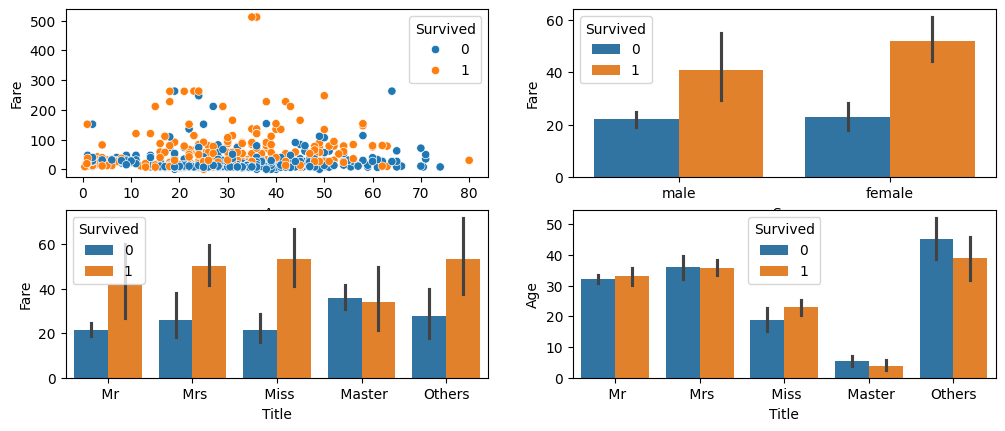

In [28]:
plt.figure(figsize=(12,10))
plt.subplot(421)
sns.scatterplot(x=titanic.Age,y=titanic.Fare,hue=titanic.Survived)
plt.subplot(422)
sns.barplot(x=titanic.Sex,y=titanic.Fare,hue=titanic.Survived)
plt.subplot(423)
sns.barplot(x=titanic.Title,y=titanic.Fare,hue=titanic.Survived)
plt.subplot(424)
sns.barplot(x=titanic.Title,y=titanic.Age,hue=titanic.Survived)

In [29]:
corr=titanic.corr(numeric_only=True)
corr

,Survived,Pclass,Age,Fare,Family,Ticket_len
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.240269,-0.055331
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.232783,0.054098
Age,-0.077221,-0.369226,1.000000,0.096067,0.033484,-0.024086
Fare,0.257307,-0.549500,0.096067,1.000000,-0.217026,-0.016002
Family,-0.240269,0.232783,0.033484,-0.217026,1.000000,0.065627
Ticket_len,-0.055331,0.054098,-0.024086,-0.016002,0.065627,1.000000


<Axes: >

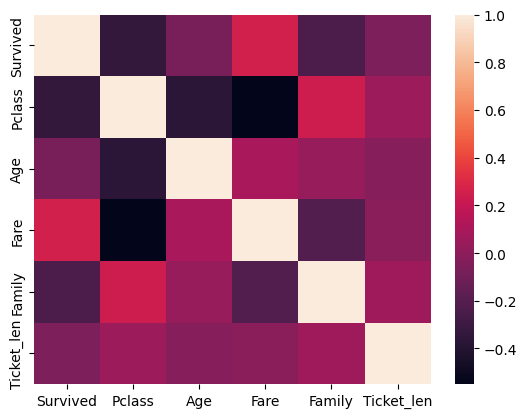

In [30]:
sns.heatmap(corr)

C:\Users\moury\AppData\Local\Temp\ipykernel_15732\3785934432.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.Pclass,label='Plcass')
C:\Users\moury\AppData\Local\Temp\ipykernel_15732\3785934432.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.Age,label='Age')
C:\Users\moury

<Axes: xlabel='Ticket_len', ylabel='Density'>

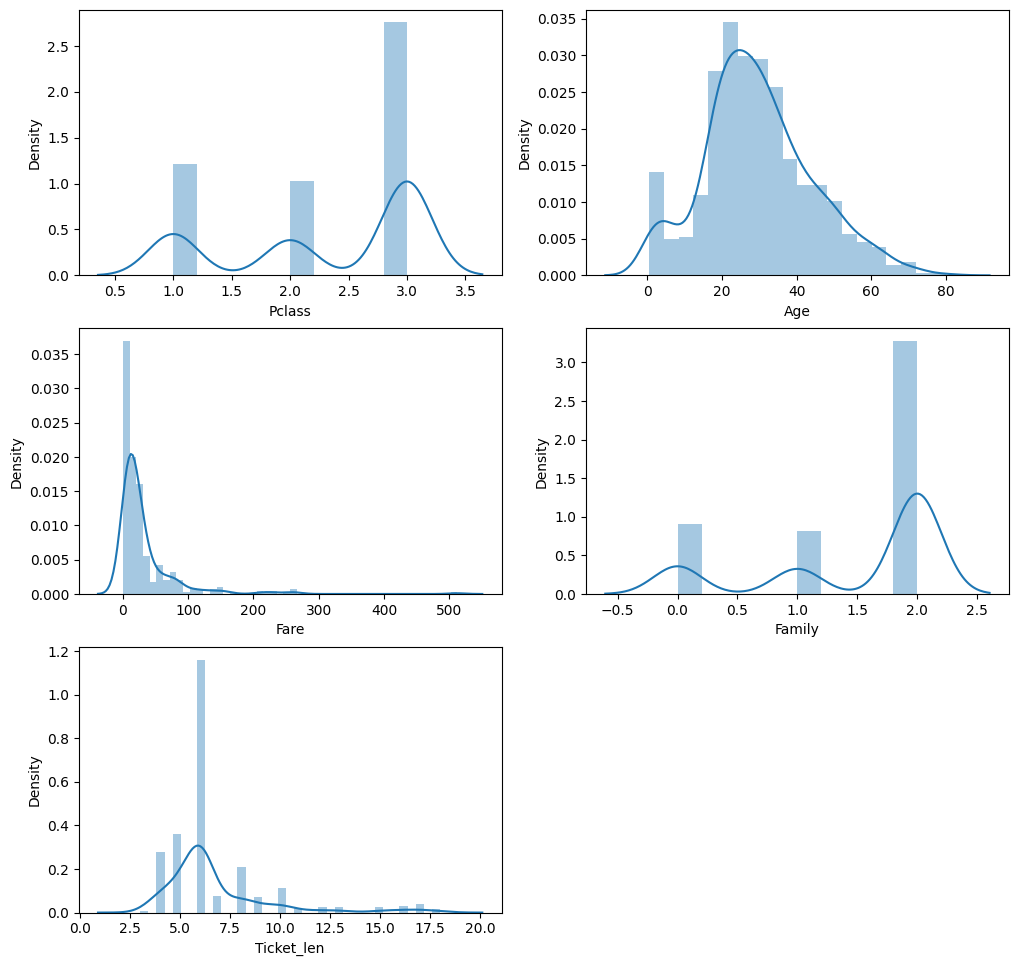

In [31]:
plt.figure(figsize=(12,20))
plt.subplot(521)
sns.distplot(titanic.Pclass,label='Plcass')
plt.subplot(522)
sns.distplot(titanic.Age,label='Age')
plt.subplot(523)
sns.distplot(titanic.Fare,label='Fare')
plt.subplot(524)
sns.distplot(titanic.Family,label='Family')
plt.subplot(525)
sns.distplot(titanic.Ticket_len,label='ticket_len')

In [32]:
from sklearn.model_selection import cross_val_score,train_test_split

In [33]:
x=titanic.drop(columns=['Survived'])
y=titanic.Survived

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [35]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.preprocessing import StandardScaler,FunctionTransformer,OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,SimpleImputer,IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [36]:
def clip_outliers_iqr(X):
    X = pd.DataFrame(X)
    for col in X.columns:
        q1 = X[col].quantile(0.05)
        q3 = X[col].quantile(0.95)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        X[col] = X[col].clip(lower, upper)
    return X

clipper = FunctionTransformer(clip_outliers_iqr)

In [37]:
titanic.isnull().mean()*100

Survived       0.00000
Pclass         0.00000
Sex            0.00000
Age           19.86532
Ticket         0.00000
Fare           0.00000
Embarked       0.00000
Title          0.00000
Family         0.00000
Ticket_len     0.00000
Deck           0.00000
dtype: float64

In [38]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked',
       'Title', 'Family', 'Ticket_len', 'Deck'],
      dtype='object')

In [39]:
Decktrf= (
    'Deck',Pipeline([
        ('encode',OneHotEncoder(handle_unknown='ignore'))
    ]),['Deck']
)

In [40]:
tickettrf= (
    'Ticket',Pipeline([
        ('encode',OneHotEncoder(handle_unknown='ignore'))
    ]),['Ticket']
)

In [41]:
Agetrf=(
    'Age',Pipeline([
        ('impute',IterativeImputer()),
        ('outilers',clipper),
        ('scaling',StandardScaler())
    ]),['Age']
)

In [42]:
Faretrf=(
    'fare',Pipeline([
        ('outliers',clipper),
        ('scaling',StandardScaler())
    ]),['Fare']
)

In [43]:
embarkedtrf=(
    'embarked',Pipeline([
        ('encode',OneHotEncoder())
    ]),['Embarked']
)

In [44]:
Sextrf=(
    'sex',Pipeline([
        ('OneHotEncoder',OneHotEncoder())
    ]),['Sex']
)

In [45]:
ticketlentrf=(
    'ticketlen',Pipeline([
        ('scaling',StandardScaler())
    ]),['Ticket_len']
)

In [46]:
Titletrf=(
    'title',Pipeline([
        ('encode',OneHotEncoder())
    ]),['Title']
)

In [47]:
transformer=ColumnTransformer(transformers=[Sextrf, Agetrf, tickettrf, Faretrf, embarkedtrf,
       Titletrf, ticketlentrf, Decktrf],remainder='passthrough')

In [48]:
lr=LogisticRegression()
sgd=SGDClassifier()

In [49]:
lr_pipe=Pipeline([
    ('transformer',transformer),
    ('classifier',lr)
])

In [50]:
sgd_pipe=Pipeline([
    ('transformer',transformer),
    ('classifier',sgd)
])

In [51]:
from sklearn.metrics import accuracy_score
lr_pipe.fit(x_train,y_train)
y_pred=lr_pipe.predict(x_test)
accuracy_score(y_test,y_pred)

0.8268156424581006

In [52]:
sgd_pipe.fit(x_train,y_train)
y_pred=sgd_pipe.predict(x_test)
accuracy_score(y_test,y_pred)

0.7988826815642458

In [53]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier

In [54]:
rfc=RandomForestClassifier(n_estimators=100,
                           max_depth=5,
                           max_samples=0.5,
                           max_features=0.2,
                           oob_score=True)

In [55]:
rfc_pipe=Pipeline([
    ('transformer',transformer),
    ('classifier',rfc)
])

In [56]:
rfc_pipe.fit(x_train,y_train)
y_pred=rfc_pipe.predict(x_test)
accuracy_score(y_test,y_pred)

0.7877094972067039

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
rfc=RandomForestClassifier()
rfc_pipe=Pipeline([
    ('transformer',transformer),
    ('classifier',rfc)
])

In [59]:
n_estimators=[100,50,500,10]
max_depth=[1,5,7,3,9]
max_features=[0.2,0.5,0.25,0.75,1]
bootstrap=[True,False]
n_jobs=[1,-1]
max_samples=[0.2,0.5,0.25,0.75,1]
param_grid={
    'classifier__n_estimators': n_estimators,
    'classifier__max_depth':  max_depth,
    'classifier__max_features': max_features,
    'classifier__n_jobs': n_jobs,
    'classifier__bootstrap': bootstrap,
    'classifier__max_samples': max_samples

}

In [ ]:
grid.best_score_,grid.best_params_

(np.float64(0.8540037427361371),
 {'classifier__bootstrap': True,
  'classifier__max_depth': 9,
  'classifier__max_features': 0.25,
  'classifier__max_samples': 0.75,
  'classifier__n_estimators': 100,
  'classifier__n_jobs': 1})